## Load Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')
df['duration_s'] = df['duration_ms']/1000

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211.160
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",167.066
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",250.546
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224.493
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,200.560


In [3]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## EDA

In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

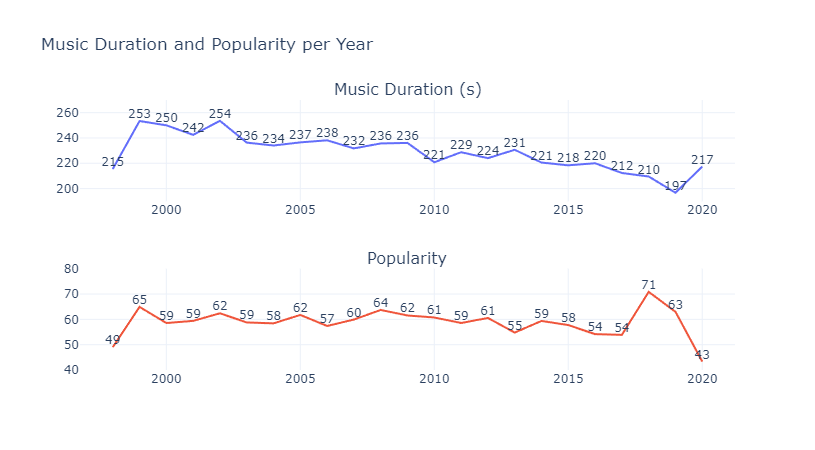

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_avg_by_year = df[['year', 'duration_s', 'popularity']].groupby('year').mean().reset_index()

# Create subplot with two graphs per year
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Music Duration (s)', 'Popularity'))

# Add line graphs to the subplot
fig.add_trace(go.Scatter(x=df_avg_by_year['year'], y=df_avg_by_year['duration_s'], mode='lines+text', text=df_avg_by_year['duration_s'].round(), textposition='top center', name='Music Duration (s)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_avg_by_year['year'], y=df_avg_by_year['popularity'], mode='lines+text', text=df_avg_by_year['popularity'].round(), textposition='top center', name='Popularity'), row=2, col=1)

# Update layout with white background, adjusted margins, and white theme
fig.update_layout(title='Music Duration and Popularity per Year',
                  showlegend=False, autosize=True,
                  template='plotly_white')

# Update y-axis
fig.update_yaxes(range=[190, 270], row=1, col=1)
fig.update_yaxes(range=[40, 80], row=2, col=1)


# Show the subplot
fig.show()

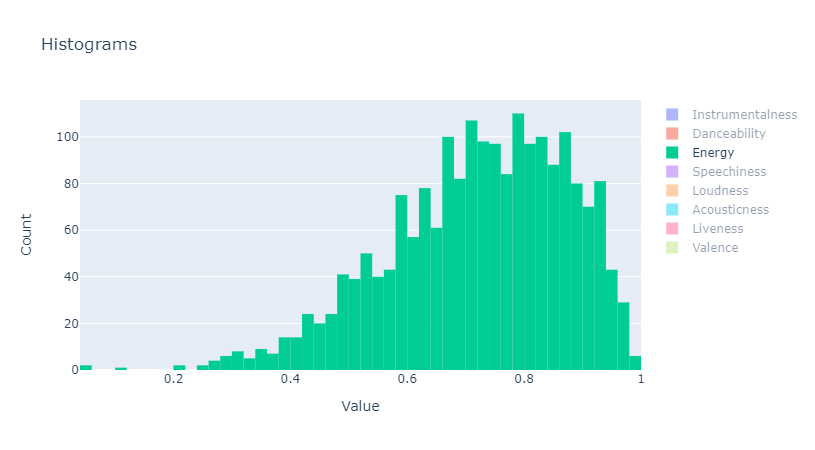

In [5]:
import pandas as pd
import plotly.express as px

# Define the histogram labels
histogram_labels = ['instrumentalness', 'danceability', 'energy', 'speechiness', 'loudness', 'acousticness', 'liveness', 'valence']

# Create a figure with subplots
fig = go.Figure()

# Add histograms to each subplot
for label in histogram_labels:
    fig.add_trace(go.Histogram(x=df[label], name=label.capitalize()))

# Update layout and show the figure
fig.update_layout(barmode='overlay', title='Histograms', xaxis_title='Value', yaxis_title='Count')
fig.show()


### Categorization

In [2]:
def to_categorical(column, labels):
    num_labels = len(labels)
    quantiles = np.linspace(0, 1, num_labels + 1)
    bins = np.quantile(column, q=quantiles)
    categorical_data = pd.cut(column, bins, labels=labels, include_lowest=True)
    return categorical_data

def categorize_years(year):
    if year < 2000:
        return '90s'
    elif year < 2010:
        return 'from 2000 to 2010'
    elif year < 2020:
        return 'from 2010 to 2020'
    else:
        return 'recent'

In [3]:
df['duration_s'] = to_categorical(df['duration_s'], 
                                  ['very short', 'short', 'normal', 'long', 'very long'])

LMH = ['low', 'medium', 'high']


# I excluded the instrumentalness feature from the analysis because our exploratory data analysis 
# revealed that the majority of our data points fall within a narrow range.
df['year'] = df['year'].apply(categorize_years)
df['danceability'] = to_categorical(df['danceability'], LMH)
df['acousticness'] = to_categorical(df['acousticness'], LMH)
df['speechiness'] = to_categorical(df['speechiness'], LMH)
df['popularity'] = to_categorical(df['popularity'], LMH)
df['loudness'] = to_categorical(df['loudness'], LMH)
df['liveness'] = to_categorical(df['liveness'], LMH)
df['valence'] = to_categorical(df['valence'], LMH)
df['energy'] = to_categorical(df['energy'], LMH)

In [4]:
import random

spotify_dataset = []

# Add some synonyms to expand our analysis
synonyms_dict = {
    'music' : ['song', 'track'],
    'popularity': ['reputation', 'acceptance'],
    'danceability': ['rhythm', 'movability'],
    'low popularity': ['unknown'],
    'low energy': ['calm', 'relaxing'],
    'energy': ['vigor', 'vitality', 'power'],
    'loudness': ['volume', 'intensity'],
    'liveness': ['vividness', 'presence'],
    'valence': ['positivity', 'emotion']
}

keys_list = list(synonyms_dict.keys())

for i,row in df.iterrows():
    
    select_synonyms = [random.choice([True, False]) for _ in range(len(synonyms_dict))]
    instruction = f"A {row['duration_s']} music, with a {row['popularity']} popularity, {row['danceability']} danceability, {row['energy']} energy, {row['loudness']} loudness, {row['liveness']} liveness, {row['valence']} valence, genre {row['genre']} and {row['energy']} energy"
    for j, select_synonym in enumerate(select_synonyms):
        if select_synonym:
            reference_word = keys_list[j]
            instruction = instruction.replace(reference_word, random.choice(synonyms_dict[reference_word]))
    response = f"{row['artist']} - {row['song']}"
    
    spotify_dataset.append(f'Instruction: {instruction}\n\nResponse: {response}')

In [5]:
print(spotify_dataset[0])

Instruction: A short music, with a high acceptance, high danceability, high energy, medium loudness, high liveness, high positivity, genre pop and high energy

Response: Britney Spears - Oops!...I Did It Again


## LLM MODEL

### Gemma Installation

In [6]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".

# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

import keras
import keras_nlp

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


2024-03-28 21:12:50.589373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 21:12:50.589511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 21:12:50.739116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
%%time

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")

Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


CPU times: user 7.02 s, sys: 10.1 s, total: 17.1 s
Wall time: 1min 3s


Testing before training:

In [8]:
instruction = 'Can you suggest a music that would be perfect for relaxing and with a high popularity?'
question = f'Instruction: {instruction}\n\nResponse: '
print(gemma_lm.generate(question, max_length=64))

Instruction: Can you suggest a music that would be perfect for relaxing and with a high popularity?

Response: 1. I think that the music that would be perfect for relaxing and with a high popularity is "The song of the wind" by the band "The Beatles".

2. The song is very


The Gemma model really brought us a very popular band, but this song is from another author named Oscar Pascasio on Spotify. What we intend with this model is to optimize this search recommendation algorithm.

### Fine Tunning

LoRA (Low Rank Adaptation)

In [9]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=4)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

# Results

## Training our Model

In [10]:
%%time

# Limit the input sequence length to 128 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 128

# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)

# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

gemma_lm.fit(spotify_dataset, epochs=2, batch_size=1)

Epoch 1/2
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 870s 410ms/step - loss: 0.7950 - sparse_categorical_accuracy: 0.5738
Epoch 2/2
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 832s 416ms/step - loss: 0.3772 - sparse_categorical_accuracy: 0.7179
CPU times: user 29min 9s, sys: 7.57 s, total: 29min 17s
Wall time: 28min 24s


## Testing

In [17]:
instruction = 'Can you suggest a music that would be perfect for relaxing and with a high popularity?'
question = f'Instruction: {instruction}\n\nResponse: '
print(gemma_lm.generate(question, max_length=64))

Instruction: Can you suggest a music that would be perfect for relaxing and with a high popularity?

Response: 3 Doors Down - Here Without You (feat. Gavin DeGraw)


Now we received a completely different response, this band 3 Doors Down is indeed very famous and the song is theirs. However, it is not so calm. You can Listen, clicking on the link below:

[3 Doors Down - Here Without You](https://www.youtube.com/watch?v=kPBzTxZQG5Q)


In [12]:
instruction = 'Can you suggest a unknown song that has low energy and high emotion?'
question = f'Instruction: {instruction}\n\nResponse: '
print(gemma_lm.generate(question, max_length=64))

Instruction: Can you suggest a unknown song that has low energy and high emotion?

Response: 5 Seconds of Summer - Youngblood - 2018 - Official Music Video - YouTube


You can listen, clicking on the link below:

[5 Seconds of Summer - Youngblood](https://www.youtube.com/watch?v=-RJSbO8UZVY)